## Libraries and Packages

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Python\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train_processed_data.csv')
test = pd.read_csv('test_processed_data.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,182.0950,OUT010,732.3800,15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,994.7052,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## 1 Baseline Model

In [3]:
#mean based
mean_sales = train['Item_Outlet_Sales'].mean()

#Define the dataframe ID for submissiong
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#export submission file
base1.to_csv('mean_algo.csv',index=False)

## 2. Liner Model

In [4]:
#Define target and ID columns
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection,metrics

def modelfit(algo,dtrain,dtest,predictors,target,IDcol,filename):
    #Fit the algorithm on data
    algo.fit(dtrain[predictors],dtrain[target])
    
    #predict training data
    dtrain_predictions = algo.predict(dtrain[predictors])
    
    #perform cross validation
    cv_score = model_selection.cross_val_score(algo,dtrain[predictors],dtrain[target],cv=20,scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #print model report
    print('\n Model Report')
    print("RMSE : %.4g" %np.sqrt(metrics.mean_squared_error(dtrain[target].values,dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score), np.std(cv_score),
         np.min(cv_score), np.max(cv_score)))
    
    #predict on test data
    dtest[target] = algo.predict(dtest[predictors])
    dtest[target] = abs(dtest[target])
    
    #Export submission file
    IDcol.append(target)
    submission = pd.DataFrame({x : dtest[x] for x in IDcol})
    submission.to_csv(filename,index=False)


 Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.4 | Min - 1075 | Max - 1210


<AxesSubplot:title={'center':'Model Coefficient'}>

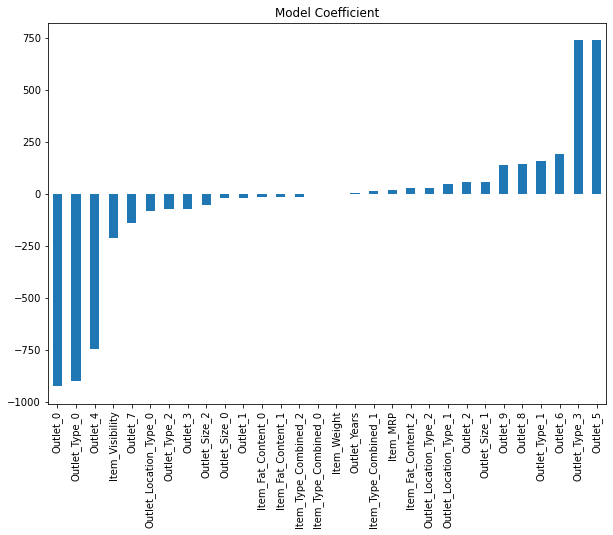

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [ x for x in train.columns if x not in [target]+IDcol]

#print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1,train,test,predictors,target,IDcol,"Linear_Reg.csv")

coef1 = pd.Series(alg1.coef_,predictors).sort_values()
coef1.plot(kind='bar',title="Model Coefficient", figsize=(10,7))

## 3.Ridge Regression Model


 Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.68 | Min - 1076 | Max - 1217


<AxesSubplot:title={'center':'Model Coefficient'}>

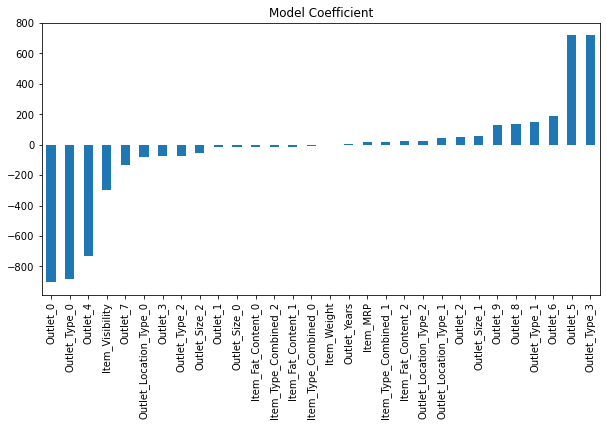

In [6]:
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2,train,test,predictors,target,IDcol,"Ridge_reg.csv")

coef2 = pd.Series(alg2.coef_,predictors).sort_values()
coef2.plot(kind='bar',title="Model Coefficient", figsize=(10,5))

## 4. Decision Tree Model


 Model Report
RMSE : 1060
CV Score : Mean - 1091 | Std - 44.05 | Min - 1006 | Max - 1174


<AxesSubplot:title={'center':'Feature Importance'}>

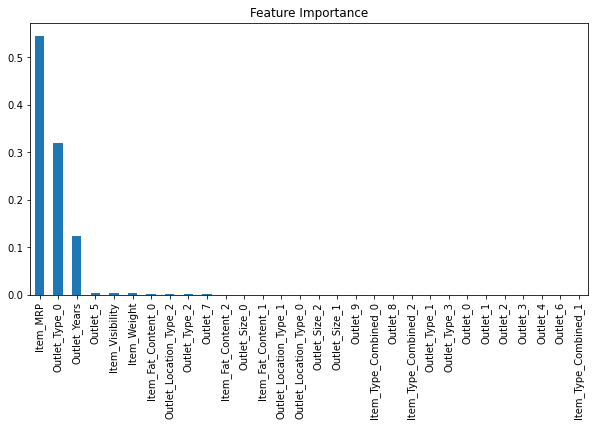

In [7]:
from sklearn.tree import DecisionTreeRegressor

predictors = [ x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
modelfit(alg3,train,test,predictors,target,IDcol,"DTReg.csv")

coef3 = pd.Series(alg3.feature_importances_,predictors).sort_values(ascending=False)
coef3.plot(kind='bar',title="Feature Importance",figsize=(10,5))


 Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


<AxesSubplot:title={'center':'Feature Importance'}>

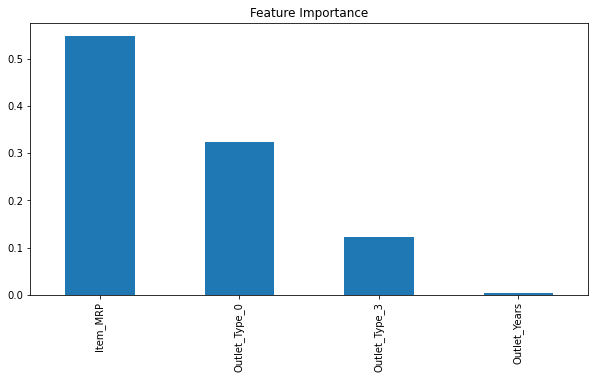

In [8]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_Years','Outlet_Type_3']

alg3 = DecisionTreeRegressor(max_depth=8,min_samples_leaf=150)
modelfit(alg3,train,test,predictors,target,IDcol,"updated_DTR.csv")
coef4 = pd.Series(alg3.feature_importances_,predictors).sort_values(ascending=False)
coef4.plot(kind='bar',title="Feature Importance",figsize=(10,5))

## 5. RandomForestRegressor


 Model Report
RMSE : 1073
CV Score : Mean - 1083 | Std - 43.52 | Min - 1020 | Max - 1161


<AxesSubplot:title={'center':'Feature Importance'}>

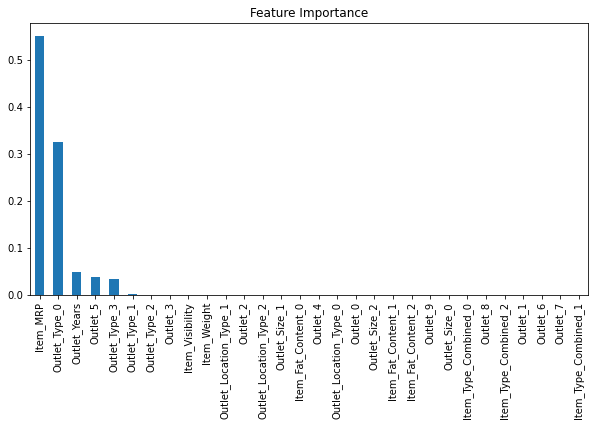

In [9]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg5 = RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_leaf=100,n_jobs=4)
modelfit(alg5,train,test,predictors,target,IDcol,"RFRegress.csv")

coef5 = pd.Series(alg5.feature_importances_,predictors).sort_values(ascending=False)
coef5.plot(kind="bar",title = "Feature Importance",figsize=(10,5))


 Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.81 | Min - 1020 | Max - 1161


<AxesSubplot:title={'center':'Feature Importance'}>

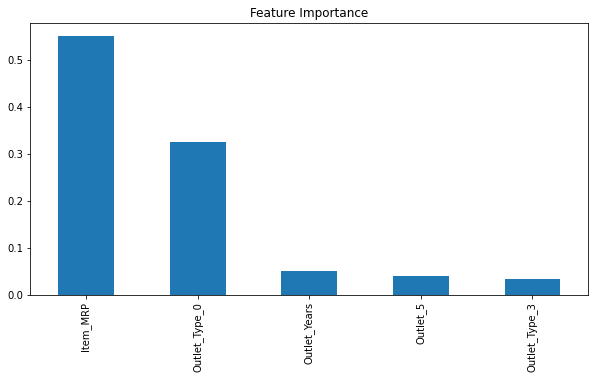

In [10]:
from sklearn.ensemble import RandomForestRegressor
predictors = ['Item_MRP','Outlet_Type_0','Outlet_Years','Outlet_Type_3','Outlet_5']

alg5 = RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_leaf=100,n_jobs=4)
modelfit(alg5,train,test,predictors,target,IDcol,"updated_RFRegress.csv")

coef5 = pd.Series(alg5.feature_importances_,predictors).sort_values(ascending=False)
coef5.plot(kind="bar",title = "Feature Importance",figsize=(10,5))

## 7 RandomizedSearch CV

In [11]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [12]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [13]:
from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
predictors = [x for x in train.columns if x not in [target]+IDcol]
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_random = GridSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train[predictors], train[target])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.9min


In [ ]:
rf_random.best_params_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]

#alg5 = RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_leaf=100,n_jobs=4)
alg5 = RandomForestRegressor(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto', max_depth= 10, bootstrap= True)
modelfit(alg5,train,test,predictors,target,IDcol,"RFRegress_v3.csv")

coef5 = pd.Series(alg5.feature_importances_,predictors).sort_values(ascending=False)
coef5.plot(kind="bar",title = "Feature Importance",figsize=(10,5))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predictors = ['Item_MRP','Outlet_Type_0','Outlet_Years','Outlet_Type_3','Outlet_5','Item_Visibility']

alg5 = RandomForestRegressor(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto', max_depth= 10, bootstrap= True)
modelfit(alg5,train,test,predictors,target,IDcol,"RFRegress_v4.csv")

coef5 = pd.Series(alg5.feature_importances_,predictors).sort_values(ascending=False)
coef5.plot(kind="bar",title = "Feature Importance",figsize=(10,5))

## 8 Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the random search model
grid_search.fit(train[predictors], train[target])

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]

#alg5 = RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_leaf=100,n_jobs=4)
alg5 = RandomForestRegressor(n_estimators= 100, min_samples_split= 12, min_samples_leaf= 4, max_features= 3, max_depth= 80, bootstrap= True)
modelfit(alg5,train,test,predictors,target,IDcol,"RFRegress_grid.csv")

coef5 = pd.Series(alg5.feature_importances_,predictors).sort_values(ascending=False)
coef5.plot(kind="bar",title = "Feature Importance",figsize=(10,5))